# Basic Probability Calculations

In [881]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Function that gives 2D distribution

In [882]:
def custom_2d_distribution(x, y):
    X, Y = np.meshgrid(x, y)
    Z = np.sin(10*X) * np.cos(10*Y) + 0.5 * np.sin(10*X) * np.sin(10*Y)
    #'''
    # Apply Hann window
    hann_x = np.hanning(len(x))
    hann_y = np.hanning(len(y))
    window = np.outer(0.01*hann_x, 0.01*hann_y)
    
    # Apply the window to the distribution
    Z *= window
    #'''
    # Ensure the distribution is always positive
    Z[Z < 0] = 0
    
    return X, Y, Z

## Prior box

In [883]:
def define_prior_box(x, y, box_x, box_y):
    X, Y = np.meshgrid(x, y)
    prior_box = (X >= box_x[0]) & (X <= box_x[1]) & (Y >= box_y[0]) & (Y <= box_y[1])
    return prior_box

## Sampling of the reference probability on a 2D regular grid in the prior box

In [884]:
def sample_distribution_within_prior_box(Z, prior_box):
    Z_prior_box = Z[prior_box]
    return Z_prior_box

# Define the range for x and y
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

# Define the prior box coordinates
box_x = (-0.5, 0.5)
box_y = (-0.5, 0.5)

## Plot

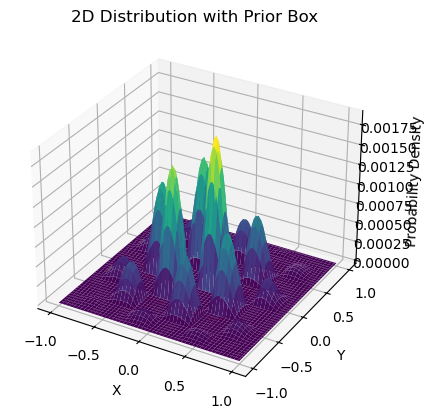

Sampled values within the prior box:
[1.80785982e-05 1.97472671e-05 2.06233192e-05 ... 7.18397116e-06
 6.87880531e-06 6.29753760e-06]


In [885]:
# Calculate the 2D distribution
X, Y, Z = custom_2d_distribution(x, y)

# Define the prior box
prior_box = define_prior_box(x, y, box_x, box_y)

# Sample the distribution within the prior box
Z_prior_box = sample_distribution_within_prior_box(Z, prior_box)

# Normalize the entire PDF
Z_normalized = Z / np.sum(Z)

# Plot the 3D graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_normalized, cmap='viridis')

# Plot the prior box
ax.plot([box_x[0], box_x[0], box_x[1], box_x[1], box_x[0]], 
        [box_y[0], box_y[1], box_y[1], box_y[0], box_y[0]], 
        zs=0, color='r', linestyle='--', alpha=0.5)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability Density')
ax.set_title('2D Distribution with Prior Box')

plt.show()

# Print sampled values within the prior box
print("Sampled values within the prior box:")
print(Z_prior_box)

## Contour plot the distribution

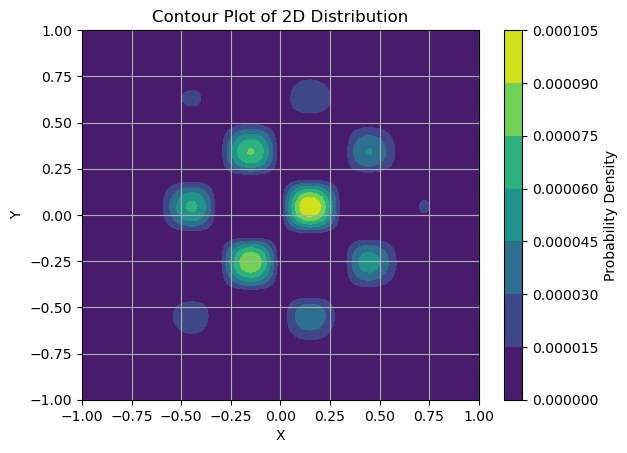

In [886]:
# Calculate the 2D distribution
X, Y, Z_normalized = custom_2d_distribution(x, y)

# Create a contour plot
plt.contourf(X, Y, Z_normalized, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of 2D Distribution')
plt.colorbar(label='Probability Density')
plt.grid(True)
plt.show()

## Marginalization of the distribution
**-> two 1D distributions**

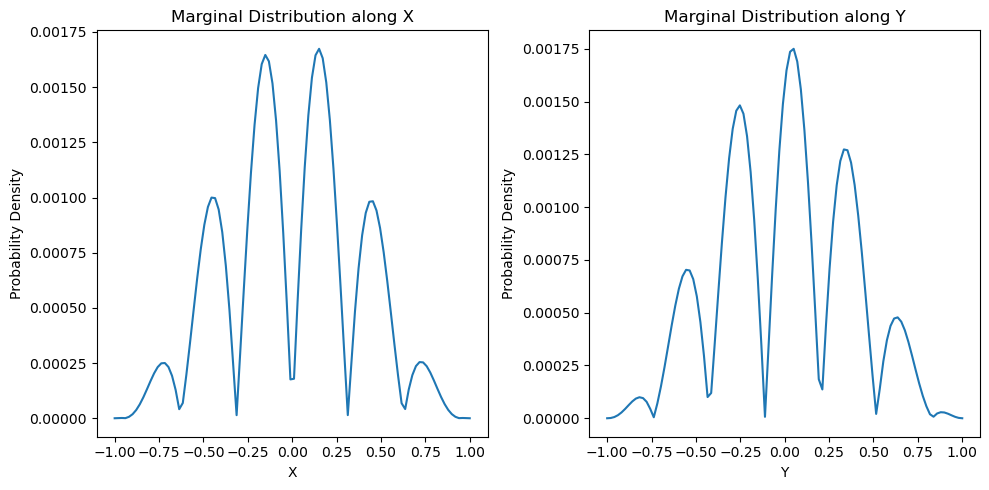

In [887]:
# Marginalize the distribution to obtain 1D distributions
Z_marginal_x = np.sum(Z_normalized, axis=0)
Z_marginal_y = np.sum(Z_normalized, axis=1)

# Plot the marginalized distributions
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x, Z_marginal_x)
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Marginal Distribution along X')

plt.subplot(1, 2, 2)
plt.plot(y, Z_marginal_y)
plt.xlabel('Y')
plt.ylabel('Probability Density')
plt.title('Marginal Distribution along Y')

plt.tight_layout()
plt.show()

**Checking that marginalization does not alter the normalization of the pdf**

In [888]:
# Normalize each marginal distribution individually
Z_marginal_x /= np.sum(Z_marginal_x)
Z_marginal_y /= np.sum(Z_marginal_y)

# Check normalization of the marginalized distributions
sum_marginal_x = np.sum(Z_marginal_x)
sum_marginal_y = np.sum(Z_marginal_y)

# Print the sum of values in the marginalized distributions
print("Sum of values in the marginalized distribution along X:", sum_marginal_x)
print("Sum of values in the marginalized distribution along Y:", sum_marginal_y)

Sum of values in the marginalized distribution along X: 1.0000000000000002
Sum of values in the marginalized distribution along Y: 1.0


## Cumulative distribution function of the 1D distribution

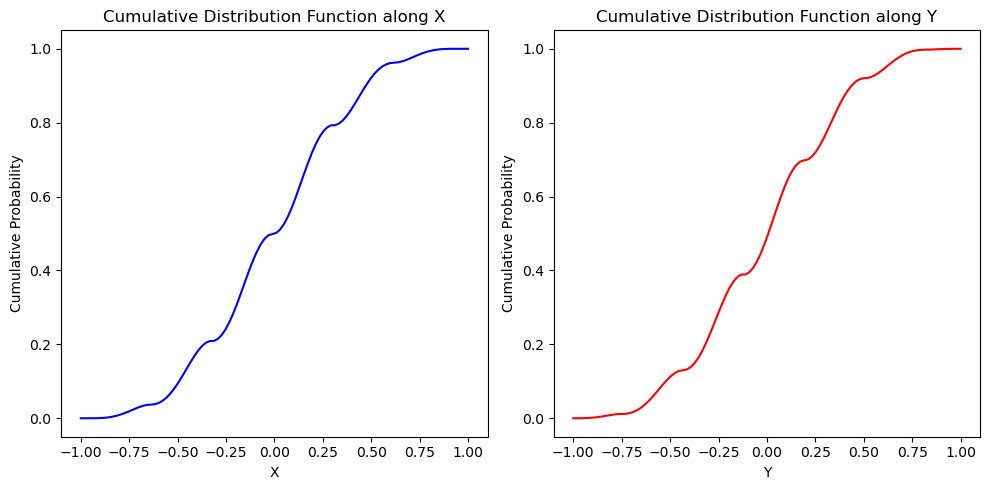

In [889]:
# Calculate the cumulative distribution function (CDF)
CDF_x = np.cumsum(Z_marginal_x)
CDF_y = np.cumsum(Z_marginal_y)

# Plot the cumulative distribution function (CDF)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x, CDF_x, color='blue')
plt.xlabel('X')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function along X')

plt.subplot(1, 2, 2)
plt.plot(y, CDF_y, color='red')
plt.xlabel('Y')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function along Y')

plt.tight_layout()
plt.show()

## Mean, median and mode

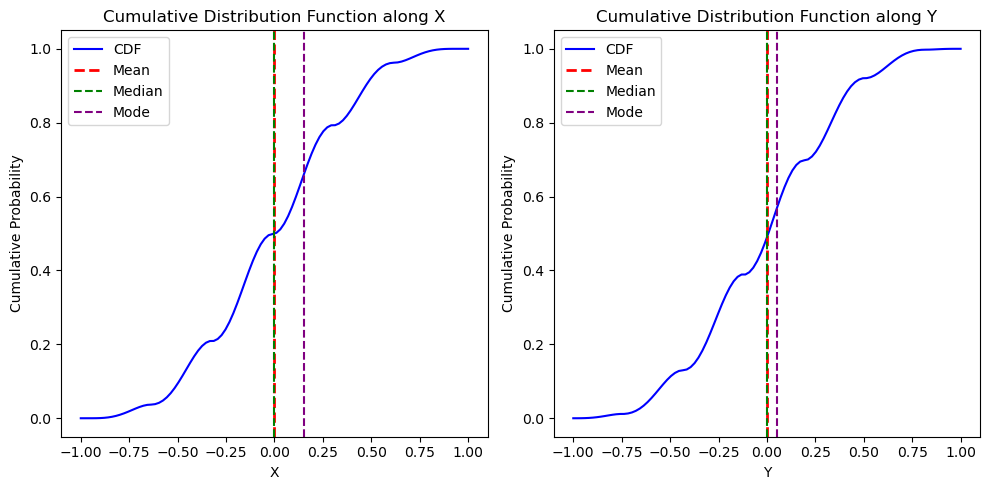

Statistics for X-axis:
Mean: 8.215650382226158e-17
Median: 5.551115123125783e-17
Mode: 0.1515151515151516

Statistics for Y-axis:
Mean: 8.215650382226158e-17
Median: 5.551115123125783e-17
Mode: 0.05050505050505061


In [890]:
# Calculate mean, median, and mode
mean_x = np.mean(x)
median_x = np.median(x)
mode_x = x[np.argmax(Z_marginal_x)]

mean_y = np.mean(y)
median_y = np.median(y)
mode_y = y[np.argmax(Z_marginal_y)]

# Plot the cumulative distribution function (CDF) with mean, median, and mode
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x, CDF_x, color='blue', label='CDF')
plt.axvline(mean_x, color='red', linestyle='--', label='Mean', linewidth=2)
plt.axvline(median_x, color='green', linestyle='--', label='Median')
plt.axvline(mode_x, color='purple', linestyle='--', label='Mode')
plt.xlabel('X')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function along X')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(y, CDF_y, color='blue', label='CDF')
plt.axvline(mean_y, color='red', linestyle='--', label='Mean', linewidth=2)
plt.axvline(median_y, color='green', linestyle='--', label='Median')
plt.axvline(mode_y, color='purple', linestyle='--', label='Mode')
plt.xlabel('Y')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function along Y')
plt.legend()

plt.tight_layout()
plt.show()

# Print calculated statistics
print("Statistics for X-axis:")
print("Mean:", mean_x)
print("Median:", median_x)
print("Mode:", mode_x)

print("\nStatistics for Y-axis:")
print("Mean:", mean_y)
print("Median:", median_y)
print("Mode:", mode_y)

## Variance of the 1D distribution

In [891]:
# Calculate variance of the 1D distribution
variance_x = np.var(x)
variance_y = np.var(y)

# Print calculated statistics
print("Statistics for X-axis:")
print("Mean:", mean_x)
print("Median:", median_x)
print("Mode:", mode_x)
print("Variance:", variance_x)

print("\nStatistics for Y-axis:")
print("Mean:", mean_y)
print("Median:", median_y)
print("Mode:", mode_y)
print("Variance:", variance_y)

Statistics for X-axis:
Mean: 8.215650382226158e-17
Median: 5.551115123125783e-17
Mode: 0.1515151515151516
Variance: 0.34006734006734013

Statistics for Y-axis:
Mean: 8.215650382226158e-17
Median: 5.551115123125783e-17
Mode: 0.05050505050505061
Variance: 0.34006734006734013


## Gaussian approximation of the distribution

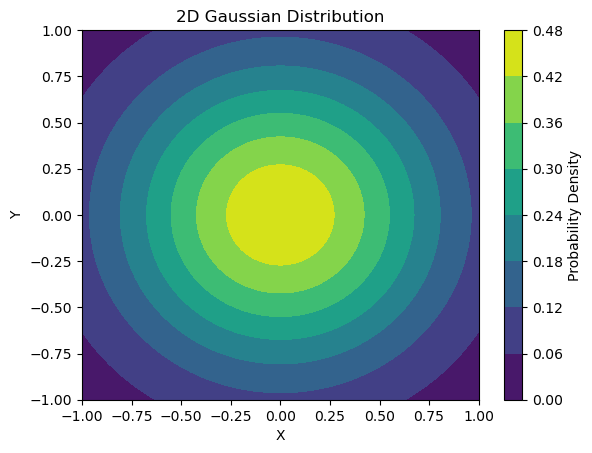

In [892]:
from scipy.stats import multivariate_normal

# Define the mean vector
mean_vector = [mean_x, mean_y]

# Define the covariance matrix
cov_matrix = [[variance_x, 0],
              [0, variance_y]]

# Create a grid of points
x_grid, y_grid = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
pos = np.dstack((x_grid, y_grid))

# Create the multivariate normal distribution
gaussian = multivariate_normal(mean=mean_vector, cov=cov_matrix)

# Evaluate the density at each point in the grid
density = gaussian.pdf(pos)

# Plot the 2D Gaussian distribution
plt.figure()
plt.contourf(x_grid, y_grid, density, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Gaussian Distribution')
plt.colorbar(label='Probability Density')
plt.show()

## 68% HPD region for the 1D distribution

The **68% Highest Posterior Density (HPD) region** is a Bayesian statistical concept used to estimate credible intervals for parameters or distributions. It represents the narrowest interval that contains *68% of the posterior probability density*. In other words, it is the region in the parameter space (or distribution space) where the posterior probability density is maximized while still containing 68% of the total probability mass.

The 68% HPD region is often used as a measure of uncertainty in Bayesian analysis. It provides a range of plausible values for parameters or distributions based on observed data and prior knowledge.

In practice, the 68% HPD region can be computed numerically from samples drawn from the posterior distribution or analytically for simple distributions. It is a useful tool for summarizing uncertainty and making probabilistic statements about parameters or distributions in Bayesian inference.

For a symmetric 68% HPD region, the total probability mass is distributed equally on both sides of the median, with 68% of the probability mass contained within the region. Therefore, *the lower bound is typically chosen at the 16th percentile, and the upper bound is chosen at the 84th percentile to capture the central 68% of the distribution*.

This choice ensures that the resulting HPD region has a balanced coverage of the distribution while maintaining symmetry around the median.

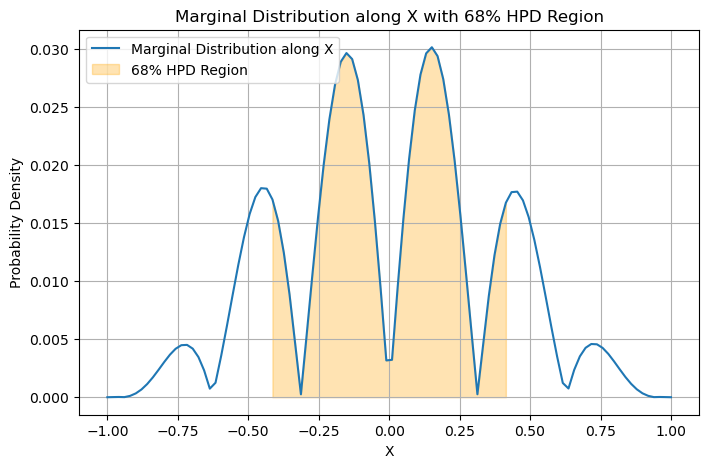

In [893]:
# Calculate the cumulative distribution function (CDF)
CDF_x = np.cumsum(Z_marginal_x)

# Find the index corresponding to the lower and upper bounds of the 68% HPD region
lower_index = np.argmax(CDF_x >= 0.16)
upper_index = np.argmax(CDF_x >= 0.84)

# Extract the corresponding x values
lower_bound = x[lower_index]
upper_bound = x[upper_index]

# Plot the 1D distribution along with the HPD region
plt.figure(figsize=(8, 5))
plt.plot(x, Z_marginal_x, label='Marginal Distribution along X')
plt.fill_between(x, 0, Z_marginal_x, where=((x >= lower_bound) & (x <= upper_bound)), color='orange', alpha=0.3, label='68% HPD Region')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Marginal Distribution along X with 68% HPD Region')
plt.legend()
plt.grid(True)
plt.show()

## 2D contour plot of the 2D 68% HPD region

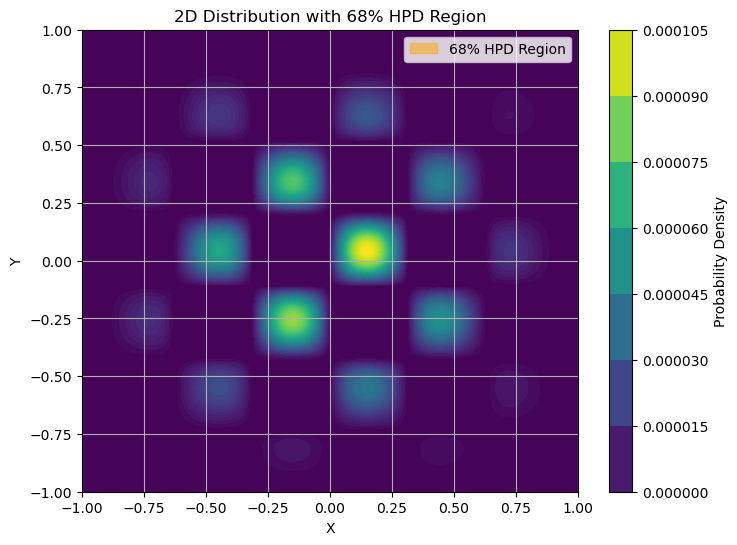

In [894]:
# Compute the joint cumulative distribution function (CDF) for the 2D distribution
CDF_2d = np.cumsum(np.cumsum(Z_normalized, axis=0), axis=1)

# Find the indices corresponding to the lower and upper bounds of the 68% HPD region
lower_index = np.unravel_index(np.argmax(CDF_2d >= 0.16), CDF_2d.shape)
upper_index = np.unravel_index(np.argmax(CDF_2d >= 0.84), CDF_2d.shape)

# Extract the corresponding X and Y values
lower_bound_x, lower_bound_y = X[lower_index], Y[lower_index]
upper_bound_x, upper_bound_y = X[upper_index], Y[upper_index]

# Create a contour plot of the 2D distribution
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z_normalized, cmap='viridis')
plt.colorbar(label='Probability Density')

# Adjust contour levels to focus on the HPD region
plt.contourf(X, Y, Z_normalized, levels=np.linspace(0, np.max(Z_normalized), 50), cmap='viridis')
'''
# Specify the lower and upper bounds for the X and Y axes
lower_bound_x = min(x)
upper_bound_x = max(x)
lower_bound_y = min(y)
upper_bound_y = max(y)
'''
# Overlay the contour plot with the 68% HPD region as a filled polygon
plt.fill_between([lower_bound_x, upper_bound_x], lower_bound_y, upper_bound_y, color='orange', alpha=0.5, label='68% HPD Region')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Distribution with 68% HPD Region')
plt.legend()
plt.grid(True)
plt.show()

The 2D contour plot of the 2D 68% Highest Posterior Density (HPD) region represents the area in the two-dimensional space where the probability density function (PDF) is relatively high compared to the surrounding regions. This region indicates where the joint probability of the two variables (X and Y) is relatively higher, encompassing the points that are more likely to occur according to the distribution.

On the other hand, the 1D region, such as the 68% HPD interval in a marginal distribution, represents the range of values along a single axis (either X or Y) where the probability density is relatively high. It shows the range of values where the probability of occurrence is relatively higher compared to the rest of the distribution.

While the 1D region focuses on the distribution along a single axis, the 2D contour plot visualizes the joint distribution in the two-dimensional space. The 68% HPD region in the contour plot highlights the area where both variables have relatively high probability densities simultaneously, capturing the correlation or relationship between them.

In summary, the 2D contour plot of the 2D 68% HPD region provides a comprehensive view of the joint distribution, indicating areas of higher probability density in the two-dimensional space, while the 1D region focuses on specific ranges along individual axes.